In [380]:
import argparse
import torch
from PIL import Image
import numpy as np
import torch
import torchvision
from torch import nn, optim
from torchvision import  datasets
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import pandas as pd
import os
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import scipy.misc



#########################################################################
#
#        QUESTION 2.1.2 code here
# 
#########################################################################

device="cpu"
# Image transformation
norm_mean = [0.485, 0.456, 0.406]
norm_std = [0.229, 0.224, 0.225]
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(norm_mean, norm_std),
    ])

# Read image from path    
img = Image.open("imagenet10/Alexnet/jybcucurxm.JPEG") #orange
#img = Image.open("imagenet10/Alexnet/n02951358_8907.JPEG") # canoe
#img = Image.open("imagenet10/Alexnet/n02123159_986.JPEG")# cat
#img = Image.open("imagenet10/Alexnet/n02486410_725.JPEG") #monkey
#img = Image.open("imagenet10/train_set/drill/n03239726_1195.JPEG") # drill

# convert image to rgb
try:
  img = img.convert('RGB') # To deal with some grayscale images in the data
except:
  pass

# apply transformation ie convert to tensor & normalize
img = transform(img) #torch.Size([3, 355, 334])
# change the dimension as per alexnet shape requirement
img = img.unsqueeze(0)#torch.Size([1, 3, 355, 334])
 
# Load the alexnet model from github
model = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained=True)
#set the model evalauation phase to true 
model.eval()

# Pass image through a single forward pass of the network
# function that does the forward pass of the image on alexnet model    
def evaluate_alexnet(model):
    with torch.no_grad():
        #images = images.to(device)
        outputs = model(img)
        _, predicted = torch.max(outputs.data, 1)
        print("predicted: ",predicted)
    return "Done"

# invoke the alexnet model prediction function
result = evaluate_alexnet( model)
print(result)

Using cache found in C:\Users\shilp/.cache\torch\hub\pytorch_vision_v0.6.0


predicted:  tensor([950])
Done


In [180]:
# Conv2d layer's index
conv_layer_indices = [0, 3, 6, 8, 10]

# The function extracts the filter weights at the given index
def extract_filter(conv_layer_idx, model):
        # Extracts a single filter from the specified convolutional layer,
		# zero-indexed where 0 indicates the first conv layer.
		# Args:
			# conv_layer_idx (int): index of convolutional layer
			# model (nn.Module): PyTorch model to extract from
	# Extract filter
    the_filter = model.features[conv_layer_idx].weight.data
    return the_filter

torch.Size([256, 256, 3, 3])


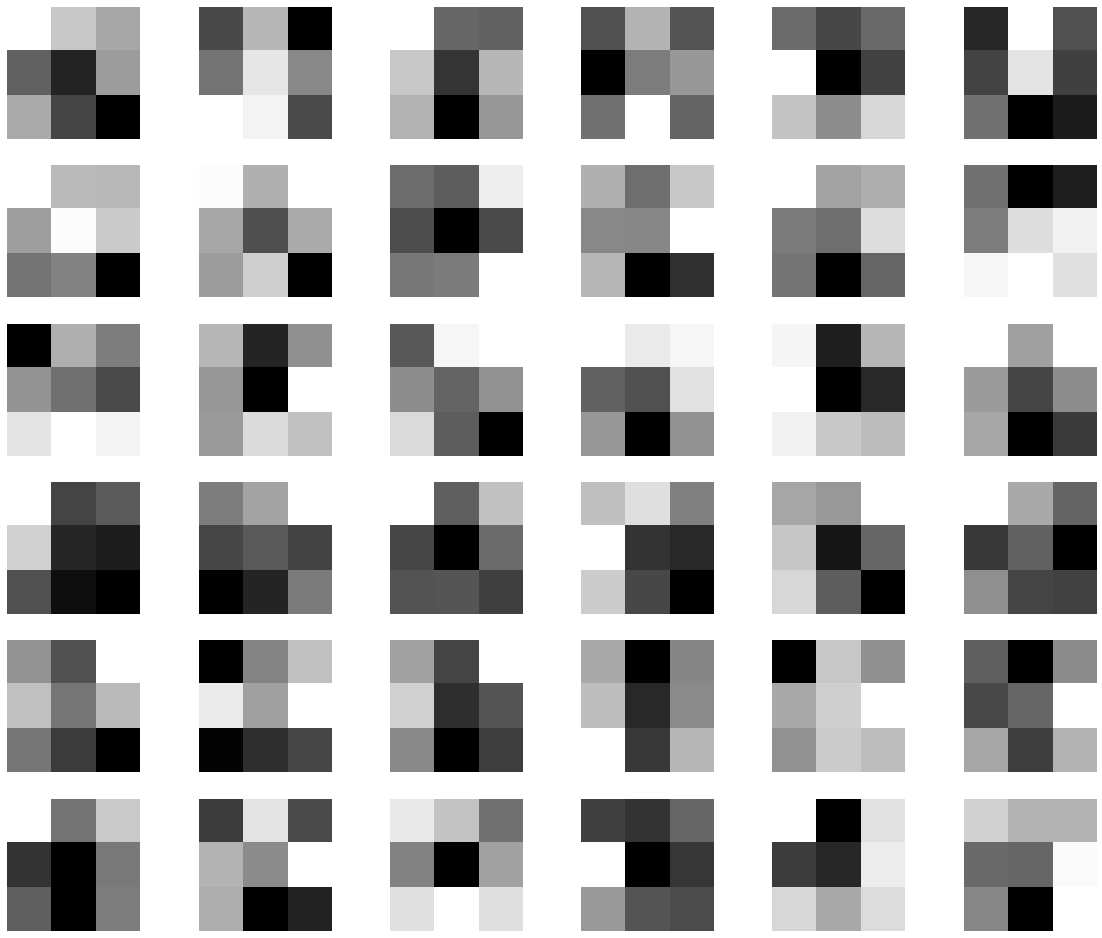

In [378]:
# The function plots the filter tensor of a conv2d layer. The weights of the Conv2d layer's filter is passed as input to the function
def show_filter(weight_of_filter_at_index):
    plt.figure(figsize=(20, 17))
            
    # for k in range(len(model_weights)):
    for i, filter in enumerate(weight_of_filter_at_index):
        plt.subplot(6, 6, i+1) 
        plt.imshow(filter[0, :, :].detach(), cmap='gray')
        plt.axis('off')
        if(i==35):
             break
    plt.show()
    
at_layer_index = 10

#Extract the filter for a particular Conv2D layer
weight_of_filter_at_index =extract_filter( at_layer_index,model)
print(weight_of_filter_at_index.shape)
#print(weight_of_filter_at_index) # Commented because its a huge tensor, hence size is printed
# plot the filter to visualize
show_filter(weight_of_filter_at_index)

In [284]:
# This method extracts the feature map at a specifix index. The index of feature map to be retreived is passed as a parameter
def extract_feature_maps(input, model, get_feature_at):
	# Args:
		# input (Tensor): input to model
		# model (nn.Module): PyTorch model to extract from
	# Extract all feature maps
	# Hint: use conv_layer_indices to access 
    img = input
    print("img shape:",img.shape)
    features = model.features
    with torch.no_grad():
        for index,layer in enumerate(features):
            img = layer(img) # forward
            if get_feature_at == index:
                return img

In [364]:
#This method plots the feature map that is passed as an input parameter. This method plots the feature map for a single feature at a time
def show_feature_map(feature_map):
    print(feature_map.shape)
    feature_map = feature_map.squeeze(0)
    feature_map = feature_map.numpy()
    feature_map_num = feature_map.shape[0]
    row_num = np.ceil(np.sqrt(feature_map_num))
    plt.figure(figsize=(20, 17))
    for index in range(1, feature_map_num+1):
        plt.subplot(6, 6, index)
        plt.imshow(feature_map[index-1], cmap='gray')
        plt.axis('off')
        if(index==35):
            break
    plt.show()

img shape: torch.Size([1, 3, 333, 500])
torch.Size([1, 256, 19, 30])


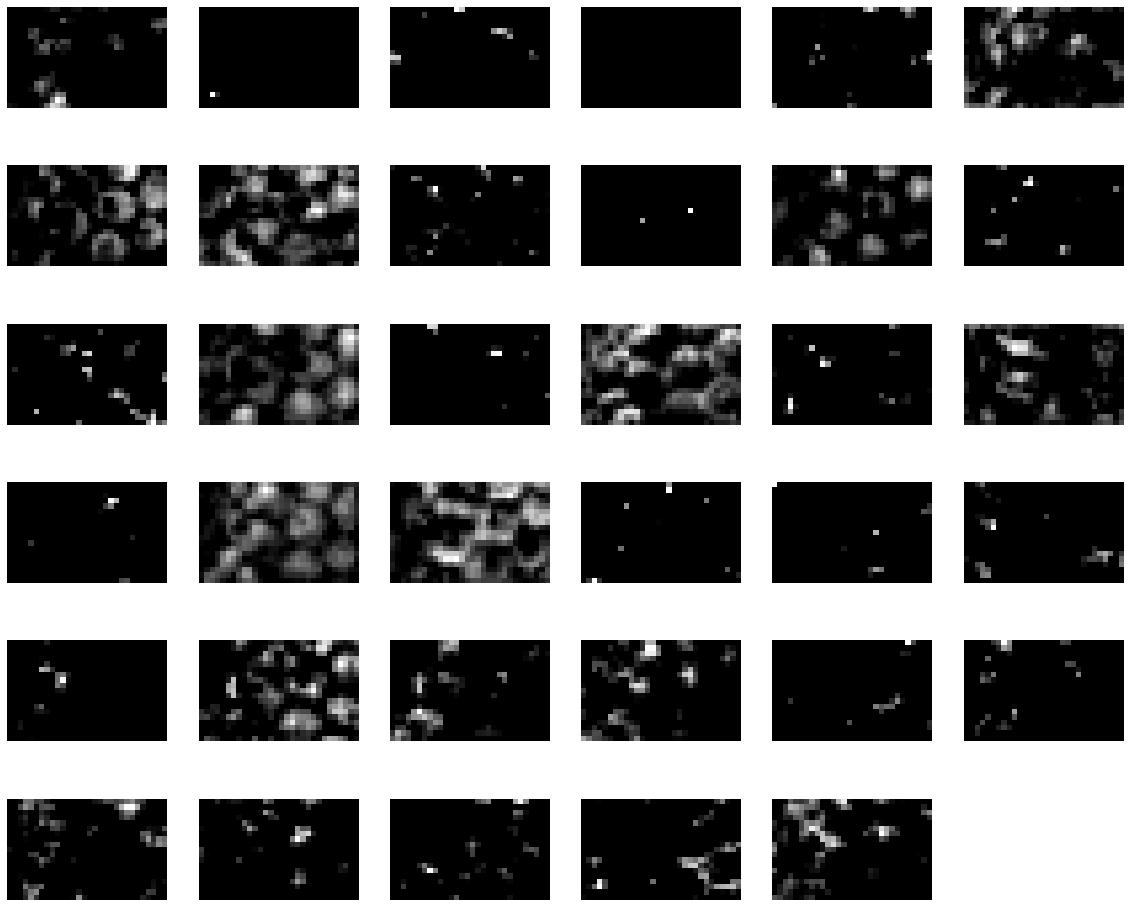

In [381]:
# Specify the index at which the feature map has to be retreived
at_layer_index=11
#Call the function to extract the feature map at a layer/feature
single_feature_map = extract_feature_maps(img, model, at_layer_index)
#Visualize the feature map
feat_map = show_feature_map(single_feature_map)